In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

**Data Collection and Processing**

In [2]:
#Load data to Data Frame
calories=pd.read_csv("/content/calories.csv")

In [3]:
#print first five rows
calories.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [4]:
exercise=pd.read_csv("/content/exercise.csv")

In [5]:
exercise.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


In [6]:
#combining two data frames exercise and calories
calories_data=pd.concat([exercise,calories["Calories"]],axis=1)

In [7]:
calories_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [8]:
#No. of rows and column
calories_data.shape

(15000, 9)

In [9]:
#getting more info about data
calories_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


In [10]:
#checking missing values
calories_data.isnull().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

**Data Analysis:-**


In [11]:
#get some statistical measures about data
calories_data.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


**Data Visualization**

In [12]:
sns.set()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


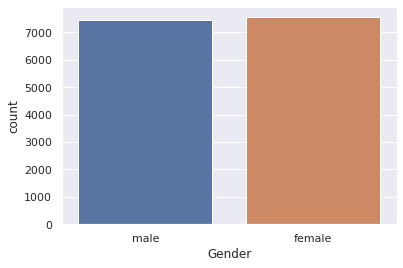

In [13]:
#Ploting Gender column in count plot
sns.countplot(calories_data["Gender"])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


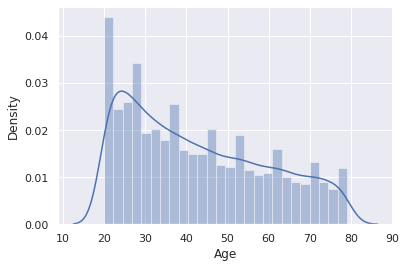

In [14]:
#Distribution Plot of Age column
sns.distplot(calories_data["Age"])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


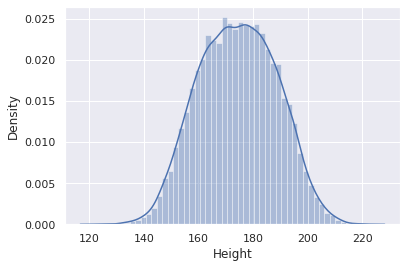

In [15]:
#Distribution Plot of Height column
sns.distplot(calories_data["Height"])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


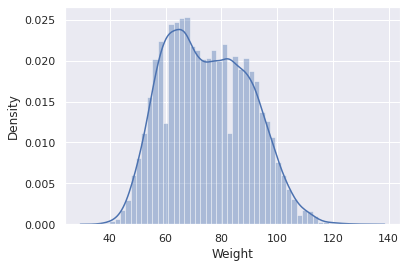

In [16]:
#Distribution Plot of Weight column
sns.distplot(calories_data["Weight"])

**Finding Correlation in DataSet**

Types of Correlation-                                       
1.Positive correlation-  If two values are directly proportional to each other,means if one value increases other also increase.This type of correlation is Positive Correlation                                   
2.Negative Correlation-  If two values are inversely proportional to each other,means if one value increases other value decrease.This type of correlation is Positive Correlation              

In [17]:
correlation=calories_data.corr()

In [19]:
calories_data.columns

Index(['User_ID', 'Gender', 'Age', 'Height', 'Weight', 'Duration',
       'Heart_Rate', 'Body_Temp', 'Calories'],
      dtype='object')

HeatMap-    It is a colourmap,which give colour based on values. if value larger i.e. 1 means Positively Correlated and less value means Negatively Correlated. If value is 0 then values are not correlated

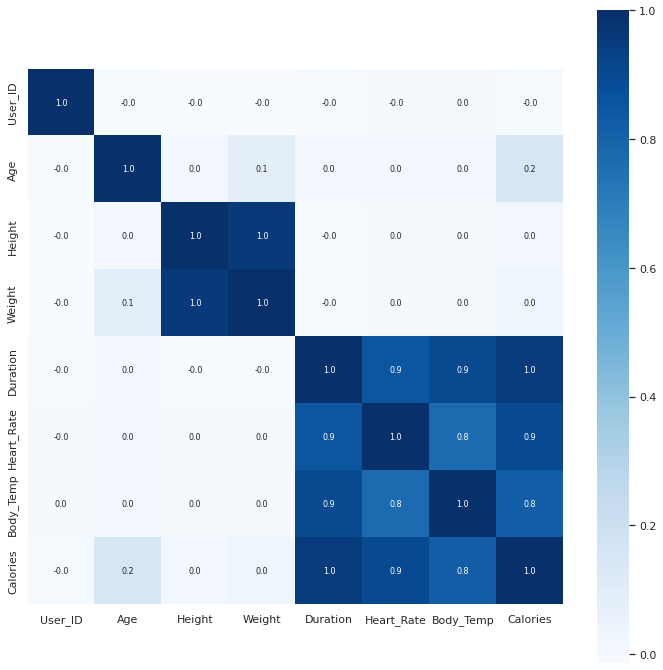

In [22]:
#Constructing  a heatmap to understand the Correlation
plt.figure(figsize=(12,12))
sns.heatmap(correlation,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap='Blues')

Duration,calories and heart rate are Positively Correlated with each other




Coverting Text data of Gender  to numerical data
 

In [23]:
calories_data.replace({"Gender":{"male":0,"female":1}},inplace=True)

In [24]:
calories_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,0,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,1,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,0,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,1,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,1,27,154.0,58.0,10.0,81.0,39.8,35.0


Seperating Target(Calories) and features(all other columns)

In [25]:
X=calories_data.drop(columns=["User_ID","Calories"],axis=1)
Y=calories_data["Calories"]


In [28]:
X.head()

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,0,68,190.0,94.0,29.0,105.0,40.8
1,1,20,166.0,60.0,14.0,94.0,40.3
2,0,69,179.0,79.0,5.0,88.0,38.7
3,1,34,179.0,71.0,13.0,100.0,40.5
4,1,27,154.0,58.0,10.0,81.0,39.8


In [29]:
Y.head()

0    231.0
1     66.0
2     26.0
3     71.0
4     35.0
Name: Calories, dtype: float64

Splitting the data into Training and Test data                        
Train_Data=Train our Machine Learning Model                                      
Test_Data=To evaluate our model

In [30]:
X_Train,X_Test,Y_Train,Y_Test=train_test_split(X,Y,test_size=0.2,random_state=2) 
#test_size=20% of test data and 80% of train data
#random_state=2 -->data is splited in specific manner(for similar splitting)


In [32]:
print(X.shape,X_Test.shape,X_Train.shape)   #X_Train-80% of data ,X_Test-20% of data

(15000, 7) (3000, 7) (12000, 7)


 **Model Training:- XGBoost Regressor**

In [33]:
#load the model
model=XGBRegressor()

In [34]:
#training the model with X_Train
model.fit(X_Train,Y_Train)

[16:20:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

**Evaluation**

Prediction on Test Data -                              
We test our model by giving values other than calories column i.e. X_Test Values and it will predict the calories burnt 

In [35]:
#Evaluate our model based on test data
test_data_prediction=model.predict(X_Test)
#Our Model will go through our test data and find calories burnt and store it in test_data_prediction

In [36]:
print(test_data_prediction)

[129.06204  223.79721   39.181965 ... 145.59767   22.53474   92.29064 ]


Mean Absolute Error-                              
While comparing Y_Test(Original) and X_Test(Predicated) values we are checking magnitude of error our model is making.                      
It should be as small as possible.

In [37]:
MAE=metrics.mean_absolute_error(Y_Test,test_data_prediction)

In [40]:
print(" Mean Absolute Error-",MAE)

 Mean Absolute Error- 2.7159012502233186
